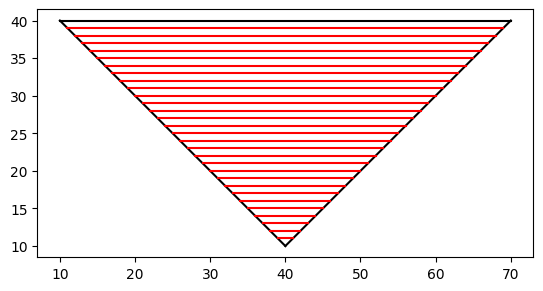

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def draw_polygon(vertices):
    # Plot the polygon edges
    for i in range(len(vertices)):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % len(vertices)]
        plt.plot([x1, x2], [y1, y2], color='black')

def scan_line_fill(vertices, fill_color):
    # Find the minimum and maximum y-coordinates to determine the scan line range
    min_y = min(vertices, key=lambda p: p[1])[1]
    max_y = max(vertices, key=lambda p: p[1])[1]

    # Iterate through each scan line
    for scan_y in range(min_y, max_y + 1):
        intersections = []

        # Check for intersections with each edge
        for i in range(len(vertices)):
            x1, y1 = vertices[i]
            x2, y2 = vertices[(i + 1) % len(vertices)]

            if (y1 <= scan_y < y2) or (y2 <= scan_y < y1):
                # Calculate x-coordinate of the intersection point
                x_intersect = int(x1 + (scan_y - y1) * (x2 - x1) / (y2 - y1))
                intersections.append(x_intersect)

        # Sort the intersection points
        intersections.sort()

        # Fill the scan line between pairs of intersection points
        for i in range(0, len(intersections), 2):
            x_start = intersections[i]
            x_end = intersections[i + 1]
            plt.plot(range(x_start, x_end + 1), [scan_y] * (x_end - x_start + 1), color=fill_color)

# Example usage
polygon_vertices = [(40, 10), (10, 40), (70, 40)]

# Draw the polygon
draw_polygon(polygon_vertices)

# Choose fill color
fill_color = 'red'

# Apply the scan-line fill algorithm
scan_line_fill(polygon_vertices, fill_color)

# Show the filled polygon
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


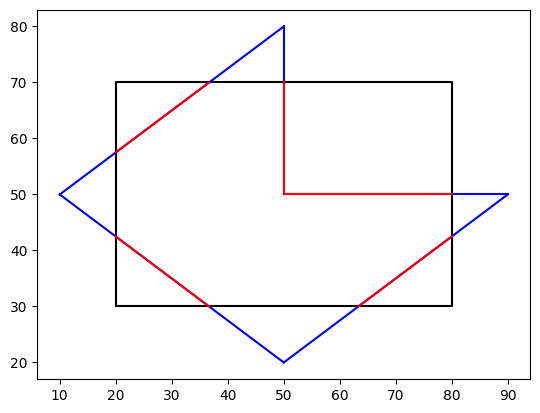

In [18]:
import matplotlib.pyplot as plt

# Region codes for Cohen-Sutherland algorithm
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

def compute_region_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE

    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT

    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP

    return code

def cohen_sutherland_clipping(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = compute_region_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = compute_region_code(x2, y2, xmin, ymin, xmax, ymax)

    while (code1 | code2) != 0:
        # Both endpoints are inside the clipping window
        if (code1 & code2) != 0:
            return None, None, None, None

        # Determine which endpoint is outside the clip window
        outside_code = code1 if code1 != 0 else code2

        # Calculate the intersection point
        if outside_code & TOP:
            x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
            y = ymax
        elif outside_code & BOTTOM:
            x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
            y = ymin
        elif outside_code & RIGHT:
            y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
            x = xmax
        elif outside_code & LEFT:
            y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
            x = xmin

        # Update the coordinates of the outside point
        if outside_code == code1:
            x1, y1 = x, y
            code1 = compute_region_code(x1, y1, xmin, ymin, xmax, ymax)
        else:
            x2, y2 = x, y
            code2 = compute_region_code(x2, y2, xmin, ymin, xmax, ymax)

    return x1, y1, x2, y2

def draw_rectangle(xmin, ymin, xmax, ymax):
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], color='black')

def draw_clipped_line(x1, y1, x2, y2, clipped=True):
    plt.plot([x1, x2], [y1, y2], color='red' if clipped else 'blue')

# Example usage
xmin, ymin, xmax, ymax = 20, 30, 80, 70
rectangle_vertices = [(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]

draw_rectangle(xmin, ymin, xmax, ymax)

# Line segments to be clipped
line_segments = [
    (50, 20, 10, 50),   # Inside the clipping window
    (50, 20, 90, 50),
    (90, 50, 50, 50),
    (50, 50, 50, 80),
    (10, 50, 50, 80),
    
    # Crossing both left and right edges
]

for line_segment in line_segments:
    x1, y1, x2, y2 = line_segment
    x1_clip, y1_clip, x2_clip, y2_clip = cohen_sutherland_clipping(x1, y1, x2, y2, xmin, ymin, xmax, ymax)
    draw_clipped_line(x1, y1, x2, y2, clipped=False)
    if x1_clip is not None:
        draw_clipped_line(x1_clip, y1_clip, x2_clip, y2_clip, clipped=True)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()
